<ol><li>
https://www.geeksforgeeks.org/how-to-draw-3d-cube-using-matplotlib-in-python/</li>

<li>https://www.bragitoff.com/2020/10/3d-trajectory-animated-using-matplotlib-python/</li>
</ol>

*Importing Libraries*

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import random


**ipympl** *enables using the interactive features of matplotlib in VSCode notebooks*
1. %matplotlib ipympl
2. %matplotlib widget

In [2]:
%matplotlib widget

*Creating axis for the Robot Cube and passing the axis to numpy, with numpy.once() funtion, which return as a new arrays of a give shapes and type*

In [3]:
row_one = [3,1,40]
data = np.ones(row_one,dtype=int)

*Adding colour Transparency (0 to 1)*
    alpha = Value

*Control colours*
* colors[0] = [1, 0, 0, alpha] # red
* colors[1] = [0, 1, 0, alpha] # green
* colors[2] = [0, 0, 1, alpha] # blue
* colors[3] = [1, 1, 0, alpha] # yellow
* colors[4] = [1, 1, 1, alpha] # grey

In [4]:
alpha = 0.9
colors = np.empty(row_one + [4], dtype=np.float32)
colors[:] = [1, 1, 1, alpha]  # grey

*Figure Plotting and Voxels used to customize the sizes and Colours*

In [5]:
data[0] = False
data[1] = False
data[2] = False

In [6]:
print(tabulate(data, tablefmt="grid"))
global no_space
no_space = 0

+----------------------------------------------------------------------------+
| [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 |
|  0 0 0]                                                                    |
+----------------------------------------------------------------------------+
| [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 |
|  0 0 0]                                                                    |
+----------------------------------------------------------------------------+
| [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 |
|  0 0 0]                                                                    |
+----------------------------------------------------------------------------+


C:\Users\Administrator\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tabulate\__init__.py:107: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  (len(row) >= 1 and row[0] == SEPARATING_LINE)


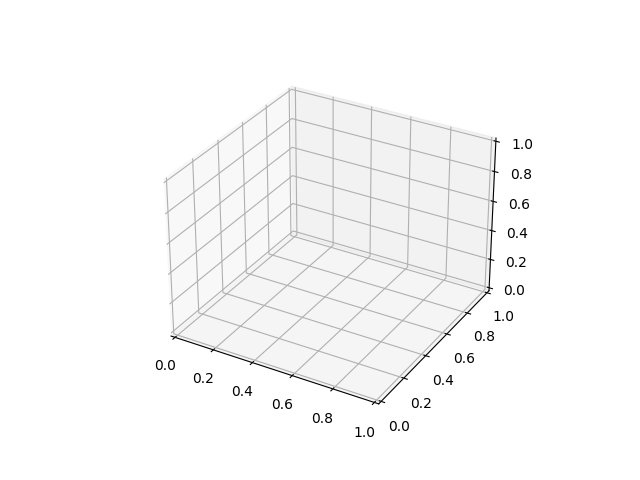

In [7]:
# position_update()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [8]:
def new_parcel(no_space):
    parcel_height =  random.randint(30,401)
    parcel_weight = random.randint(100,2001)
    slot_reqrd = int((parcel_height/40) + 1)
    parcel_code = str(parcel_height)+str(parcel_weight)
    print(f"Parcel height : {parcel_height}, Parcel weight : {parcel_weight}, Slot Required : {slot_reqrd}, Parcel Code : {parcel_code}")
    count = 0
    j = 0 
    if no_space == 0:
        for i in range(0,3):
            if count == 0 : 
                for k in range (0,38):
                    if count == 0 : 
                        top_slot = k + slot_reqrd
                        # print(f"i : {i}, j : {j}, k : {k}, Top Slot : {top_slot}")
                        if top_slot < 38:
                            if data[i, j, k] == 0 and data[i, j, top_slot] == 0 :
                                # if top_slot < 38:
                                for l in range (k,top_slot):
                                    data[i, j, l] = parcel_code
                                    if parcel_weight > 500 and parcel_weight < 1000: 
                                        colors[i,j,l] = [1, 1, 0, alpha]
                                    elif parcel_weight > 1000 and parcel_weight < 1500:
                                        colors[i,j,l] = [0, 1, 1, alpha]
                                    elif parcel_weight > 1500 and parcel_weight < 2000:
                                        colors[i,j,l] = [1, 0, 0, alpha]
                                    else:
                                        colors[i,j,l] = [0, 1, 0, alpha]
                                count = 1
                                no_space = 0
                        else : 
                            no_space = 1
    else : 
        print("Position Not Available  : HEHE")
    return slot_reqrd, parcel_code

new_parcel(no_space)
ax.voxels(data, facecolors=colors, edgecolors='white')
ax.view_init(10, 135)
print(tabulate(data, tablefmt="grid"))

Parcel height : 94, Parcel weight : 353, Slot Required : 3, Parcel Code : 94353
+----------------------------------------------------------------------------+
| [94353 94353 94353     0     0     0     0     0     0     0     0     0   |
|      0     0     0     0     0     0     0     0     0     0     0     0   |
|      0     0     0     0     0     0     0     0     0     0     0     0   |
|      0     0     0     0]                                                  |
+----------------------------------------------------------------------------+
| [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 |
|  0 0 0]                                                                    |
+----------------------------------------------------------------------------+
| [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 |
|  0 0 0]                                                                    |
+--------------------------------------------------

In [9]:
def parcel_loc(value_to_find):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            for k in range(data.shape[2]):
                if data[i, j, k] == value_to_find:
                    # If the value is found, print the index
                    print("Value found at index ({}, {}, {})".format(i, j, k))
                    found = True
                    break
            if found:
                break
        if found:
            break
    if not found:
        print("Value not found in array.")


In [11]:
def retrieve():
    ret_parcel_code = int(input(" Enter the parcel to Retrieve : "))
    parcel_loc(ret_parcel_code)
    data[data == ret_parcel_code] = 0
retrieve()
ax.voxels(data, facecolors=colors, edgecolors='white')
ax.view_init(10, 135)
print(tabulate(data, tablefmt="grid"))


Value found at index (0, 0, 0)
+----------------------------------------------------------------------------+
| [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 |
|  0 0 0]                                                                    |
+----------------------------------------------------------------------------+
| [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 |
|  0 0 0]                                                                    |
+----------------------------------------------------------------------------+
| [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 |
|  0 0 0]                                                                    |
+----------------------------------------------------------------------------+
